In [223]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [225]:

# Load the CSV file into a DataFrame
df = pd.read_csv('data/bank.csv', sep=';')

# Display the first few rows to explore the contents
print(df.head(1))

# Display summary information about the DataFrame
print(df.info())

   age         job  marital education default  balance housing loan   contact  \
0   30  unemployed  married   primary      no     1787      no   no  cellular   

   day month  duration  campaign  pdays  previous poutcome   y  
0   19   oct        79         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays     

### Data Analysis and Cleaning

In [228]:
# Remove rows with null values
df_cleaned = df.copy()
df_cleaned = df.dropna()
df_cleaned = df_cleaned[df_cleaned['job'] != 'unknown']
df_cleaned = df_cleaned[df_cleaned['education'] != 'unknown']
df_cleaned = df_cleaned.drop(columns=['contact', 'day', 'month'])

# Verify that no null values remain
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4311 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4311 non-null   int64 
 1   job        4311 non-null   object
 2   marital    4311 non-null   object
 3   education  4311 non-null   object
 4   default    4311 non-null   object
 5   balance    4311 non-null   int64 
 6   housing    4311 non-null   object
 7   loan       4311 non-null   object
 8   duration   4311 non-null   int64 
 9   campaign   4311 non-null   int64 
 10  pdays      4311 non-null   int64 
 11  previous   4311 non-null   int64 
 12  poutcome   4311 non-null   object
 13  y          4311 non-null   object
dtypes: int64(6), object(8)
memory usage: 505.2+ KB
None


In [230]:
print(f"Number of 'unknown' entries: {df_cleaned['job'].value_counts().get('unknown', 0)}")

Number of 'unknown' entries: 0


In [232]:
# Redefine job by income risk and encode groups.
job_mapping = {
    "unemployed": 2,
    "entrepreneur": 2,
    "self-employed": 2,
    "student": 2,
    "housemaid": 2,
    "retired": 2,
    "admin.": 1,
    "blue-collar": 1,
    "services": 1,
    "technician": 1,
    "management": 0
}

# Apply the mapping to create a new 'income_risk' column
df_cleaned['job_encoded'] = df_cleaned['job'].map(job_mapping)

# Verify the encoded values
print(df_cleaned[['job', 'job_encoded']].head())

           job  job_encoded
0   unemployed            2
1     services            1
2   management            0
3   management            0
4  blue-collar            1


In [234]:
# Redefine marital status by married (2 income), single (1 income)
marital_mapping = {
    "married": 2,
    "divorced": 1,
    "single": 1
}

# Apply the mapping to create a new 'income_risk' column
df_cleaned['marital_encoded'] = df_cleaned['marital'].map(marital_mapping)

# Verify the encoded values
print(df_cleaned[['marital', 'marital_encoded']].head())

   marital  marital_encoded
0  married                2
1  married                2
2   single                1
3  married                2
4  married                2


In [236]:
# Define the education mapping
education_mapping = {
    "secondary": 2,
    "primary": 1,
    "tertiary": 3,
    "unknown": 0  # You can assign 0 or any value you prefer for unknown
}

# Apply the mapping to create a new 'education_encoded' column
df_cleaned['education_encoded'] = df_cleaned['education'].map(education_mapping)

# Verify the encoded values
print(df_cleaned[['education', 'education_encoded']].head())

   education  education_encoded
0    primary                  1
1  secondary                  2
2   tertiary                  3
3   tertiary                  3
4  secondary                  2


In [238]:
# Define the binary encoding for the 'default' column
default_mapping = {
    "yes": 1,
    "no": 0
}

# Apply the mapping to create a new 'default_encoded' column
df_cleaned['default_encoded'] = df_cleaned['default'].map(default_mapping)

# Verify the encoded values
print(df_cleaned[['default', 'default_encoded']].head())

  default  default_encoded
0      no                0
1      no                0
2      no                0
3      no                0
4      no                0


In [240]:
# Define the binary encoding for the 'housing' column
housing_mapping = {
    "yes": 1,
    "no": 0
}

# Apply the mapping to create a new 'housing_encoded' column
df_cleaned['housing_encoded'] = df_cleaned['housing'].map(housing_mapping)

# Verify the encoded values
print(df_cleaned[['housing', 'housing_encoded']].head())

  housing  housing_encoded
0      no                0
1     yes                1
2     yes                1
3     yes                1
4     yes                1


In [242]:
# Define the binary encoding for the 'loan' (personal loan) column
loan_mapping = {
    "yes": 1,
    "no": 0
}

# Apply the mapping to create a new 'loan_encoded' column
df_cleaned['loan_encoded'] = df_cleaned['loan'].map(loan_mapping)

# Verify the encoded values
print(df_cleaned[['loan', 'loan_encoded']].head())

  loan  loan_encoded
0   no             0
1  yes             1
2   no             0
3  yes             1
4   no             0


In [244]:
# Count the number of occurrences of 'unknown' and 'other' in the 'poutcome' column
unknown_count = df_cleaned['poutcome'].value_counts().get('unknown', 0)
other_count = df_cleaned['poutcome'].value_counts().get('other', 0)

print(f"Number of 'unknown' entries: {unknown_count}")
print(f"Number of 'other' entries: {other_count}")

Number of 'unknown' entries: 3536
Number of 'other' entries: 188


In [246]:
# Define the binary encoding for the 'loan' (personal loan) column
y_mapping = {
    "yes": 1,
    "no": 0
}

# Apply the mapping to create a new 'loan_encoded' column
df_cleaned['y_encoded'] = df_cleaned['y'].map(y_mapping)

# Verify the encoded values
print(df_cleaned[['y', 'y_encoded']].head())

    y  y_encoded
0  no          0
1  no          0
2  no          0
3  no          0
4  no          0


In [248]:
df_cleaned = df_cleaned.drop(columns=['education', 'job', 'marital', 'marital', 'default', 'housing', 'loan', 'poutcome', 'y'])

# Display the first few rows to explore the contents
print(df_cleaned.head(1))

# Display summary information about the DataFrame
print(df_cleaned.info())

   age  balance  duration  campaign  pdays  previous  job_encoded  \
0   30     1787        79         1     -1         0            2   

   marital_encoded  education_encoded  default_encoded  housing_encoded  \
0                2                  1                0                0   

   loan_encoded  y_encoded  
0             0          0  
<class 'pandas.core.frame.DataFrame'>
Index: 4311 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4311 non-null   int64
 1   balance            4311 non-null   int64
 2   duration           4311 non-null   int64
 3   campaign           4311 non-null   int64
 4   pdays              4311 non-null   int64
 5   previous           4311 non-null   int64
 6   job_encoded        4311 non-null   int64
 7   marital_encoded    4311 non-null   int64
 8   education_encoded  4311 non-null   int64
 9   default_encoded    4311 non-null   int6

### Feature Importance Analysis

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [253]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=['y_encoded'])  # All columns except y_encoded
y = df_cleaned['y_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Get the feature coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})

# Display feature importance sorted by absolute value of the coefficients
print(feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index))

# Evaluate model performance
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              Feature  Coefficient
2            duration     1.011661
10    housing_encoded    -0.432275
3            campaign    -0.299997
11       loan_encoded    -0.253658
8   education_encoded     0.220557
4               pdays     0.199266
7     marital_encoded    -0.196832
5            previous     0.194275
1             balance     0.077375
0                 age     0.076239
9     default_encoded     0.041810
6         job_encoded     0.039080
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1158
           1       0.52      0.18      0.26       136

    accuracy                           0.90      1294
   macro avg       0.72      0.58      0.60      1294
weighted avg       0.87      0.90      0.87      1294



In [255]:
# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})

# Display feature importance sorted by value
print(rf_feature_importance.sort_values(by='Importance', ascending=False))

# Evaluate model performance
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              Feature  Importance
2            duration    0.359080
1             balance    0.172196
0                 age    0.158238
4               pdays    0.069722
3            campaign    0.058238
5            previous    0.041305
8   education_encoded    0.034634
6         job_encoded    0.032807
10    housing_encoded    0.029041
7     marital_encoded    0.024511
11       loan_encoded    0.015138
9     default_encoded    0.005089
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1158
           1       0.56      0.30      0.39       136

    accuracy                           0.90      1294
   macro avg       0.74      0.64      0.67      1294
weighted avg       0.88      0.90      0.89      1294



### Baseline

In [258]:
# Always predict 1
y_pred_baseline = [0] * len(df_cleaned['y_encoded'])

# Calculate accuracy by comparing with the true values
accuracy_baseline = accuracy_score(df_cleaned['y_encoded'], y_pred_baseline)

print(f"Baseline accuracy (always predicting 0): {accuracy_baseline:.4f}")

Baseline accuracy (always predicting 0): 0.8845


### Declaring Reusable Classification Functions

In [261]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

In [264]:
def logistic_regression(X_train_, X_test_, y_train_, y_test_):
    # Define the Logistic Regression model
    log_reg = LogisticRegression(max_iter=2000)
    
    # Hyperparameters to tune
    param_grid = [
        {'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
        {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    ]
    
    # Set up GridSearchCV
    grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
    
    # Fit the model
    grid_search_log_reg.fit(X_train_, y_train_)
    
    # Get the best estimator
    best_log_reg = grid_search_log_reg.best_estimator_
    
    # Train and test scores using the best estimator
    train_score_log_reg = best_log_reg.score(X_train_, y_train_)
    test_score_log_reg = best_log_reg.score(X_test_, y_test_)
    
    # Extract the average fit time
    average_fit_time_log_reg = grid_search_log_reg.cv_results_['mean_fit_time'][grid_search_log_reg.best_index_]
    
    # Display the results
    print(f"Best parameters (Logistic Regression): {grid_search_log_reg.best_params_}")
    print(f"Train Score (best estimator): {train_score_log_reg}")
    print(f"Test Score (best estimator): {test_score_log_reg}")
    print(f"Average Fit Time (best estimator): {average_fit_time_log_reg}")

#### KNN

In [267]:
def knn(X_train_, X_test_, y_train_, y_test_):
    # Define the KNeighborsClassifier model
    knn = KNeighborsClassifier()
    
    # Hyperparameters to tune
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    
    # Set up GridSearchCV
    grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
    
    # Fit the model
    grid_search_knn.fit(X_train_, y_train_)
    
    # Get the best estimator
    best_knn = grid_search_knn.best_estimator_
    
    # Train and test scores using the best estimator
    train_score_knn = best_knn.score(X_train_, y_train_)
    test_score_knn = best_knn.score(X_test_, y_test_)
    
    # Extract the average fit time
    average_fit_time_knn = grid_search_knn.cv_results_['mean_fit_time'][grid_search_knn.best_index_]
    
    # Display the results
    print(f"Best parameters (KNN): {grid_search_knn.best_params_}")
    print(f"Train Score (best estimator): {train_score_knn}")
    print(f"Test Score (best estimator): {test_score_knn}")
    print(f"Average Fit Time (best estimator): {average_fit_time_knn}")

#### SVM

In [270]:
def svm(X_train_, X_test_, y_train_, y_test_):
    # Define the SVC model
    svc = SVC()
    
    # Hyperparameters to tune
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2]  # Only relevant for the 'poly' kernel
    }
    
    # Set up GridSearchCV
    random_search_svc = RandomizedSearchCV(svc, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
    
    # Fit the model
    random_search_svc.fit(X_train_, y_train_)
    
    # Get the best estimator
    best_svc = random_search_svc.best_estimator_
    
    # Train and test scores using the best estimator
    train_score_svc = best_svc.score(X_train_, y_train_)
    test_score_svc = best_svc.score(X_test_, y_test_)
    
    # Extract the average fit time
    average_fit_time_svc = random_search_svc.cv_results_['mean_fit_time'][random_search_svc.best_index_]
    
    # Display the results
    print(f"Best parameters (SVC): {random_search_svc.best_params_}")
    print(f"Train Score (best estimator): {train_score_svc}")
    print(f"Test Score (best estimator): {test_score_svc}")
    print(f"Average Fit Time (best estimator): {average_fit_time_svc}")

#### Decision Tree

In [273]:
def decision_tree (X_train_, X_test_, y_train_, y_test_):
    # Define the Decision Tree Classifier model
    decision_tree = DecisionTreeClassifier()
    
    # Hyperparameters to tune
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }
    
    # Set up GridSearchCV
    grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
    
    # Fit the model
    grid_search_dt.fit(X_train_, y_train_)
    
    # Get the best estimator
    best_dt = grid_search_dt.best_estimator_
    
    # Train and test scores using the best estimator
    train_score_dt = best_dt.score(X_train_, y_train_)
    test_score_dt = best_dt.score(X_test_, y_test_)
    
    # Extract the average fit time
    average_fit_time_dt = grid_search_dt.cv_results_['mean_fit_time'][grid_search_dt.best_index_]
    
    # Display the results
    print(f"Best parameters (Decision Tree): {grid_search_dt.best_params_}")
    print(f"Train Score (best estimator): {train_score_dt}")
    print(f"Test Score (best estimator): {test_score_dt}")
    print(f"Average Fit Time (best estimator): {average_fit_time_dt}")

### Classification with strongest predictive variable: duration of last contact

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

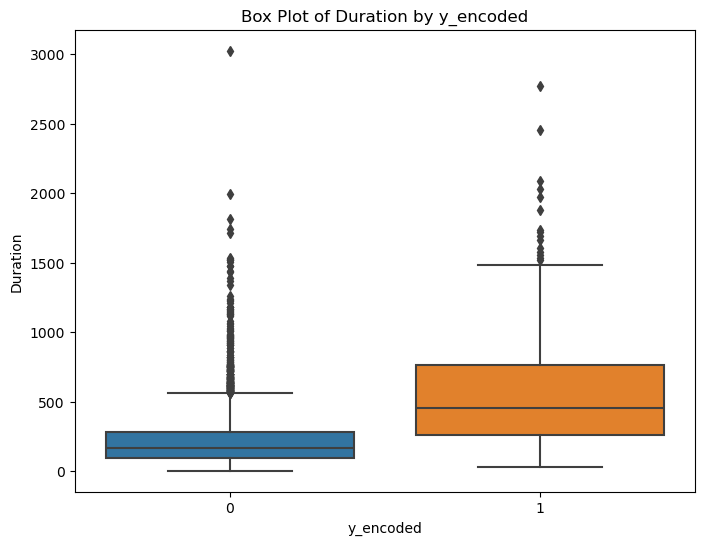

In [332]:
# Create a box plot to visualize duration split by y_encoded
plt.figure(figsize=(8, 6))
sns.boxplot(x='y_encoded', y='duration', data=df_cleaned)
plt.title('Box Plot of Duration by y_encoded')
plt.xlabel('y_encoded')
plt.ylabel('Duration')
plt.show()

/var/folders/7d/4cmb6lbj0pjgcc7xjnw7_mhr0000gn/T/ipykernel_39704/655823416.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_counts = df_cleaned.groupby(['duration_bins', 'y_encoded']).size().unstack(fill_value=0)


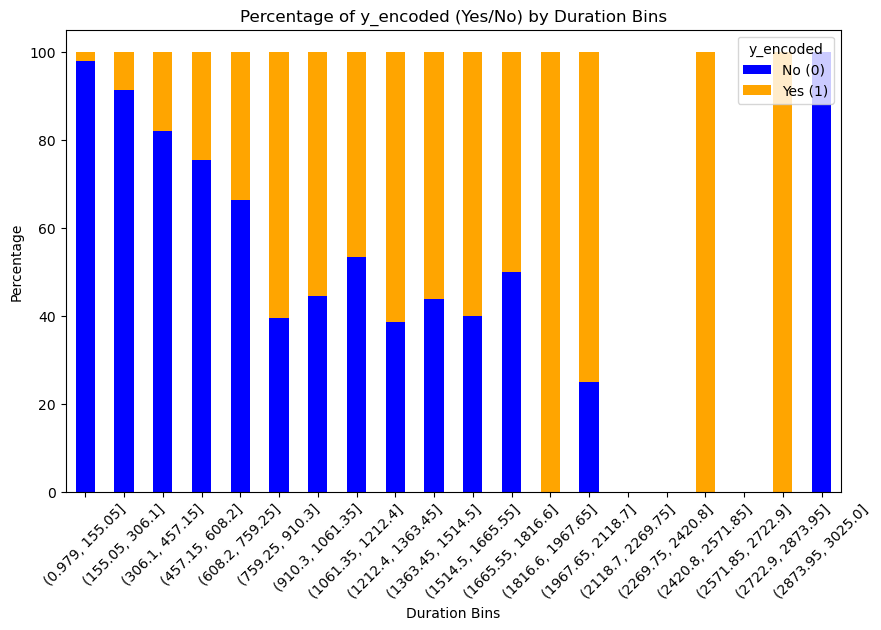

In [342]:
# Step 1: Bin the 'duration' into ranges (you can adjust the number of bins as needed)
df_cleaned['duration_bins'] = pd.cut(df_cleaned['duration'], bins=20)

# Step 2: Calculate the percentage of yes (1) and no (0) in each bin
duration_counts = df_cleaned.groupby(['duration_bins', 'y_encoded']).size().unstack(fill_value=0)
duration_percentages = duration_counts.div(duration_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot a stacked bar chart
duration_percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))

# Customize the plot
plt.title('Percentage of y_encoded (Yes/No) by Duration Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Percentage')
plt.legend(title='y_encoded', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.show()

/var/folders/7d/4cmb6lbj0pjgcc7xjnw7_mhr0000gn/T/ipykernel_39704/2613884139.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[df_cleaned['y_encoded'] == 0]['duration'], label='No (0)', color='skyblue', shade=True)
/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/7d/4cmb6lbj0pjgcc7xjnw7_mhr0000gn/T/ipykernel_39704/2613884139.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[df_cleaned['y_encoded'] == 1]['duration'], label='Yes (1)', color='orange', shade=True)
/usr/local/anaconda3/lib/

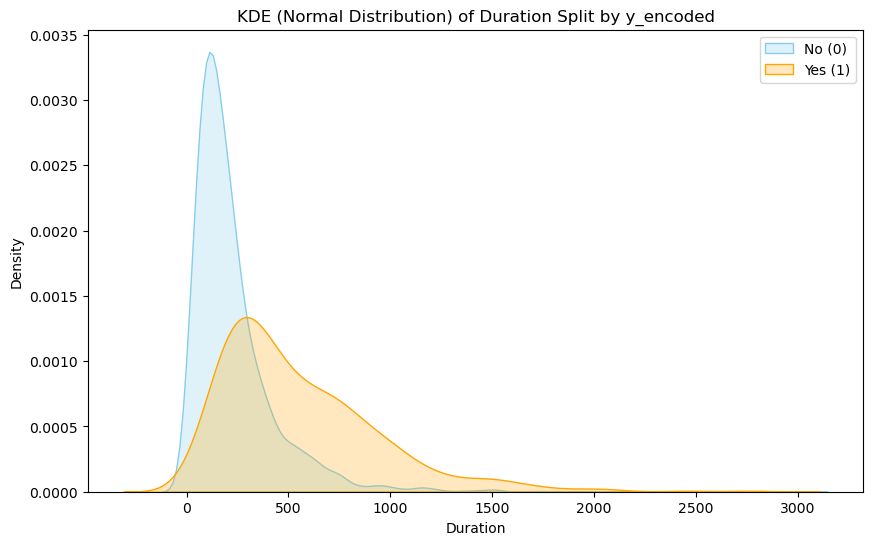

In [350]:
# Create a KDE plot for 'duration' split by 'y_encoded'
plt.figure(figsize=(10, 6))

# KDE plot for y_encoded = 0
sns.kdeplot(df_cleaned[df_cleaned['y_encoded'] == 0]['duration'], label='No (0)', color='skyblue', shade=True)

# KDE plot for y_encoded = 1
sns.kdeplot(df_cleaned[df_cleaned['y_encoded'] == 1]['duration'], label='Yes (1)', color='orange', shade=True)

# Add labels and title
plt.title('KDE (Normal Distribution) of Duration Split by y_encoded')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

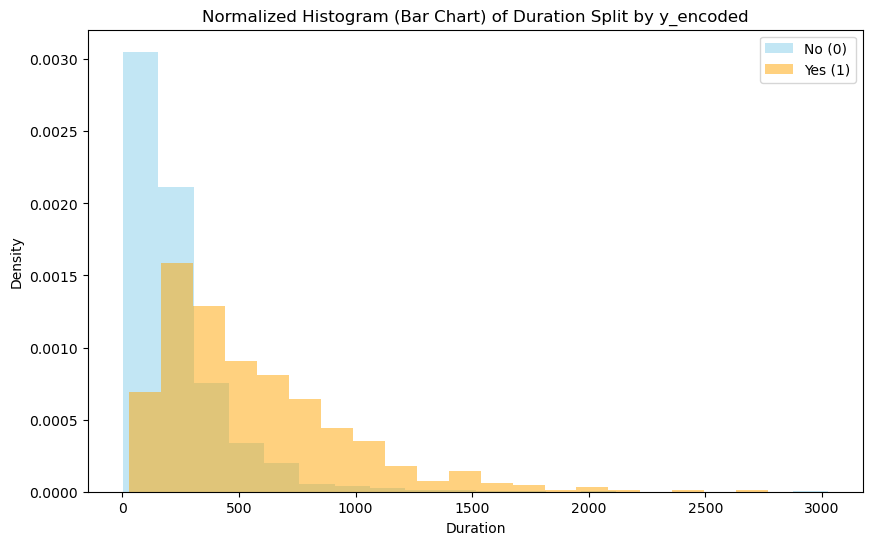

In [352]:
# Plot normalized histograms for 'duration' split by 'y_encoded'
plt.figure(figsize=(10, 6))

# Normalized histogram for y_encoded = 0
plt.hist(df_cleaned[df_cleaned['y_encoded'] == 0]['duration'], bins=20, alpha=0.5, label='No (0)', color='skyblue', density=True)

# Normalized histogram for y_encoded = 1
plt.hist(df_cleaned[df_cleaned['y_encoded'] == 1]['duration'], bins=20, alpha=0.5, label='Yes (1)', color='orange', density=True)

# Add labels and title
plt.title('Normalized Histogram (Bar Chart) of Duration Split by y_encoded')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [276]:
# Define features (X) and target (y)
X = df_cleaned[['duration']]
y = df_cleaned['y_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [278]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (Logistic Regression): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Train Score (best estimator): 0.8846536294332118
Test Score (best estimator): 0.8995363214837713
Average Fit Time (best estimator): 0.005417537689208984


In [280]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Train Score (best estimator): 0.8926085515412662
Test Score (best estimator): 0.8948995363214838
Average Fit Time (best estimator): 0.0016819953918457032


In [282]:
svm(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (SVC): {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 10}
Train Score (best estimator): 0.8882996353994034
Test Score (best estimator): 0.8995363214837713
Average Fit Time (best estimator): 0.5683332443237304


In [284]:
decision_tree(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train Score (best estimator): 0.9042094796155121
Test Score (best estimator): 0.8863987635239567
Average Fit Time (best estimator): 0.0036803245544433593


### Classification with 7 predictive variables:

In [307]:
# Define features (X) and target (y)
X = df_cleaned[['duration', 'housing_encoded', 'campaign', 'loan_encoded', 'education_encoded', 'pdays', 'marital_encoded']]
y = df_cleaned['y_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [309]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (Logistic Regression): {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Train Score (best estimator): 0.8879681803115678
Test Score (best estimator): 0.8956723338485317
Average Fit Time (best estimator): 0.005042648315429688


In [311]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Train Score (best estimator): 0.8962545575074577
Test Score (best estimator): 0.8941267387944358
Average Fit Time (best estimator): 0.00243377685546875


In [313]:
svm(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (SVC): {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 1}
Train Score (best estimator): 0.9005634736493205
Test Score (best estimator): 0.8979907264296755
Average Fit Time (best estimator): 0.11226005554199218


In [314]:
decision_tree(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Train Score (best estimator): 0.91415313225058
Test Score (best estimator): 0.8887171561051005
Average Fit Time (best estimator): 0.002672910690307617


### Classification with 3 predictive variables:

In [320]:
# Define features (X) and target (y)
X = df_cleaned[['duration', 'balance', 'age', 'campaign', 'pdays']]
y = df_cleaned['y_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [322]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (Logistic Regression): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Train Score (best estimator): 0.8849850845210474
Test Score (best estimator): 0.8979907264296755
Average Fit Time (best estimator): 0.0034934043884277343


In [324]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Train Score (best estimator): 0.893602916804773
Test Score (best estimator): 0.8964451313755796
Average Fit Time (best estimator): 0.002473258972167969


In [326]:
svm(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (SVC): {'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'C': 100}
Train Score (best estimator): 0.8810076234670202
Test Score (best estimator): 0.8956723338485317
Average Fit Time (best estimator): 16.1703022480011


In [328]:
decision_tree(X_train_scaled, X_test_scaled, y_train, y_test)

Best parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Train Score (best estimator): 0.929068611203182
Test Score (best estimator): 0.8809891808346213
Average Fit Time (best estimator): 0.0046710968017578125


In [348]:
# Calculate the mean duration for the entire dataset
mean_duration = df_cleaned['duration'].mean()
print(f"Mean duration (overall): {mean_duration:.2f}")

Mean duration (overall): 264.83
